In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [7]:
input_data =[]
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

In [10]:
n_data = len(correct_data)
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [11]:
n_in = 2
n_mid = 6
n_out = 2

In [12]:
wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

In [13]:
# 은닉층 클래스 구현

class MiddleLayer:
    def __init__(self, n_upper, n): # 가중치와 편향
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1 + np.exp(-u)) # 은닉층의 활성화함수 = 시그모이드함수
    
    def backward(self, grad_y): #역전파
        delta = grad_y * (1 - self.y)*self.y # 시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta) # 전치 T, delta
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): # 가중치와 편향 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b        

In [14]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)
    
    def backward(self, t): #역전파
        delta = self.y-t # 시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta) # 전치 T, delta
        self.grad_b = np.sum(delta, axis=0)        
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): # 가중치와 편향 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b   

In [15]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

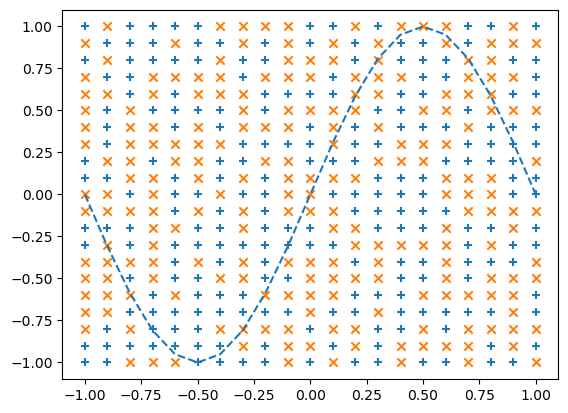

Epoch:0/101 Error:0.723069312512637


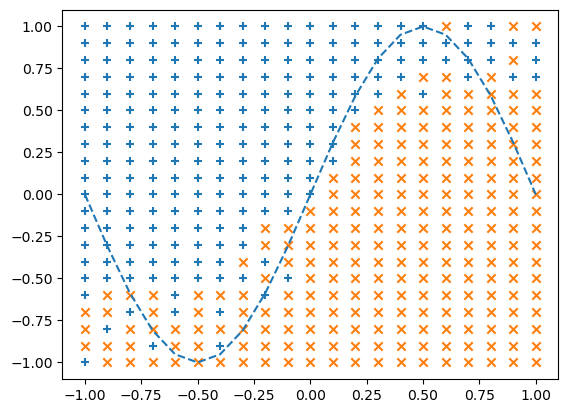

Epoch:10/101 Error:0.3054858041036672


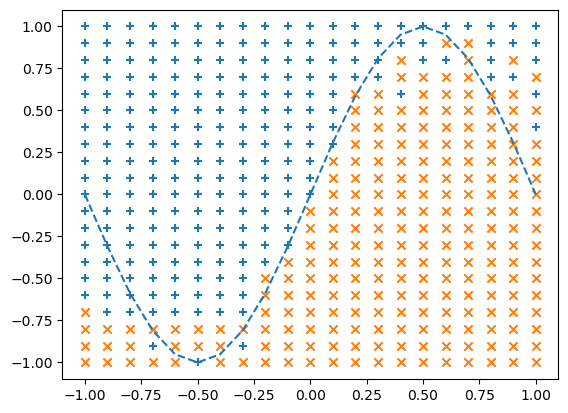

Epoch:20/101 Error:0.22586575040324827


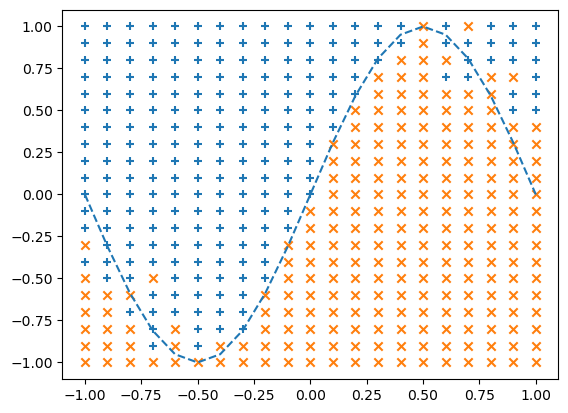

Epoch:30/101 Error:0.17924213652164486


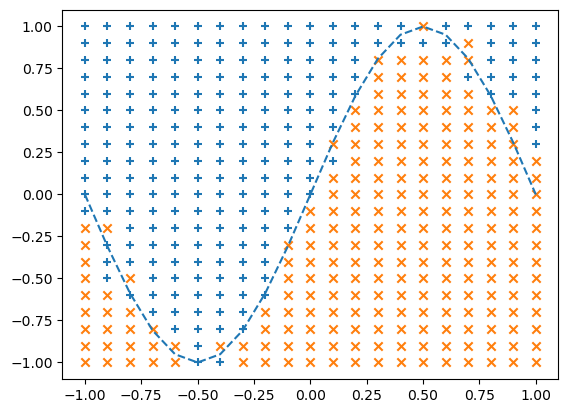

Epoch:40/101 Error:0.12431369952752981


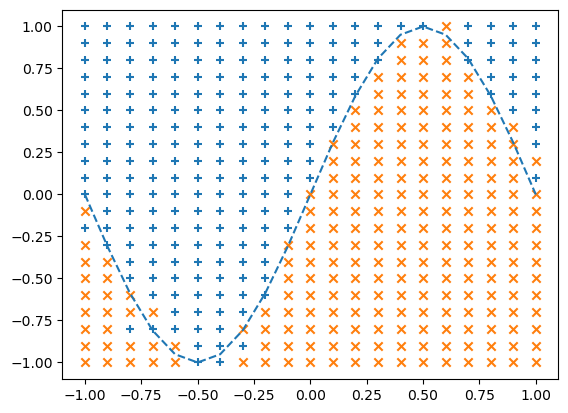

Epoch:50/101 Error:0.10026862439222613


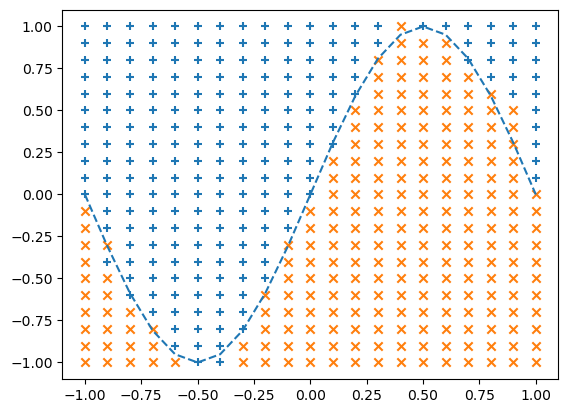

Epoch:60/101 Error:0.08935434933244897


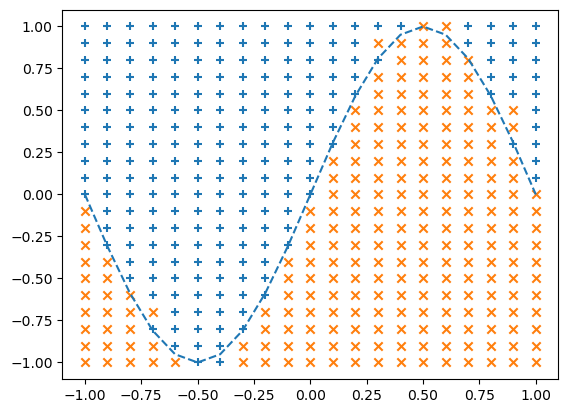

Epoch:70/101 Error:0.07733162358865008


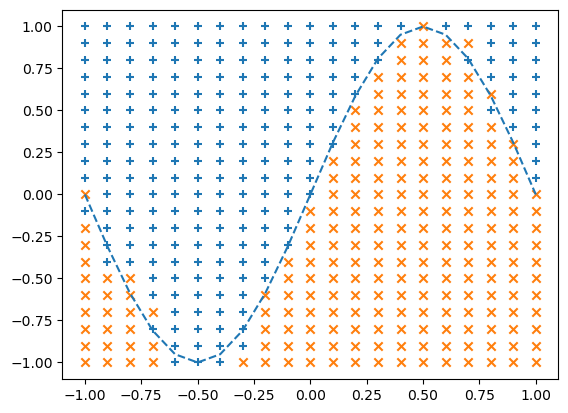

Epoch:80/101 Error:0.06927049363198781


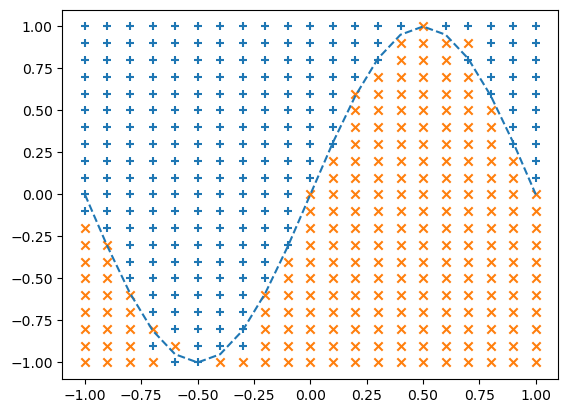

Epoch:90/101 Error:0.07466826620283443


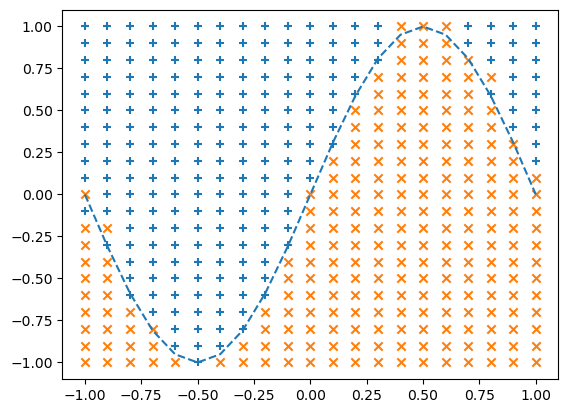

Epoch:100/101 Error:0.06243166337777448


In [16]:
sin_data = np.sin(np.pi * X)
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
   
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        # 순전파
        middle_layer.forward(x.reshape(1, 2))
        output_layer.forward(middle_layer.y)

        #역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x) 
        
        #갱신
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += -np.sum(t * np.log(y + 1e-7))
            
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

    if i%interval == 0:
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
            
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error:" + str(total_error/n_data) )